### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
#KERAS
from keras.models  import Sequential, K
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

Using TensorFlow backend.
C:\Users\jamie\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jamie\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jamie\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jamie\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

### Conn String

In [2]:
df = pd.read_csv('C://Users//jamie//Downloads//Book4.csv')

df.head(33)

df = df.drop('Date', 1)
df = df.drop('Gender', 1)

df.head()



#LOGISTICAL REGRESSION
#Building a Logistic Regression model
from sklearn.model_selection import train_test_split

#Split the epileptic data: 70%training||30% testing using the SKLearn train_test_Split
x_train, x_test,y_train,y_test = train_test_split(df.drop('Outcome',axis=1),df['Outcome'],
                                                  test_size=0.30,random_state=101)

#Training and Predicting
#Import the Logisitcal Regression Library from SKLearn
from sklearn.linear_model import LogisticRegression

#create instance of logistical regression model called logmodel
logmodel=LogisticRegression()
#pass the data to the logmodel
logmodel.fit(x_train,y_train)

#make predictions with model on unseen test data
predictions = logmodel.predict(x_test)


#Evaluation of performance metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print("Accuracy score for Logistical Regression Model is:",accuracy_score(y_test, predictions)*100)
print("\nLogisitcal Regression Classification Report\n")
print(classification_report(y_test,predictions))




cm=confusion_matrix(y_test, predictions)
fig1 = plt.gcf()
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.tab20_r)
classNames = ['Negative','Positive']
plt.title("CONFUSION MATRIX FOR LOGISTICAL REGERSSION MODEL")
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()
plt.draw()
fig1.savefig('tessstttyyy.png', dpi=100)

#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, predictions)
print('Confusion Matrix : \n', cm)

total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

#RANDOM FOREST

X = df.iloc[:, :-1].values

#y-axis uses the variable outcome as its target variable
y = df["Outcome"].values

#splitt the training data using 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11111)

#shows percentage of seizures compared to non seizures
np.mean(y), np.mean(1-y)


## Train the RF Model
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)

# Make predictions on the test set - both "hard" predictions, and the scores (percent of trees voting yes)
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)


#list the performance metrics the model emanates
print('\nAccuracy Score for Random Forest Model is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)*100))
print('\nRandom Forest roc-auc measure is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))
print("\nRandom Forest  Classification Report\n")
print(classification_report(y_test,y_pred_class_rf))



#NEURAL NETWORK

## normalize the data

normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

# 1 hidden layer, 12 hidden nodes, sigmoid activation

model_1 = Sequential([
    Dense(12, input_shape=(5,), activation="relu"),
    Dense(1, activation="sigmoid")
])

print("\n************Start of Nerual Netwrok Summary*********")
model_1.summary()

# Fit(Train) the Model
model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

#  One is a hard decision, the other is a probabilitistic score.
y_pred_class_nn_1 = model_1.predict_classes(X_test_norm)
y_pred_prob_nn_1 = model_1.predict(X_test_norm)

y_pred_class_nn_1[:10]
y_pred_prob_nn_1[:10]

# Print model performance and plot the roc curve
print('\n')
print('\nAccuracy Score for Nerual Network is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)*100))
print('\nNerual Network roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))
print("\nNerual Network Classification Report\n")
print(classification_report(y_test,y_pred_class_rf))

FileNotFoundError: [Errno 2] File b'C://Users//jamie//Downloads//Book4.csv' does not exist: b'C://Users//jamie//Downloads//Book4.csv'

NameError: name 'df' is not defined

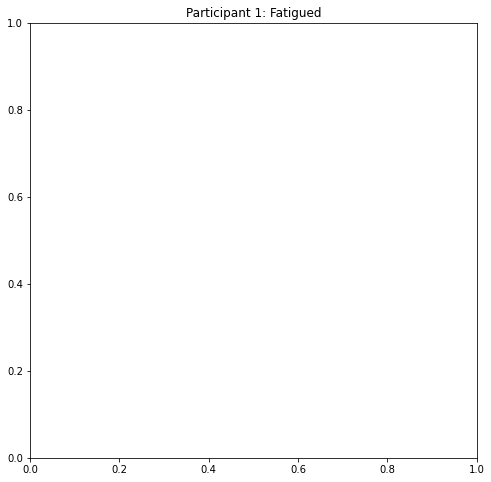

In [3]:
plt.figure(figsize = (8,8))
plt.title("Participant 1: Fatigued")
sns.boxplot(x='Outcome', y='Fatigued', data=df)